In [37]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['font.family'] = 'Osaka'

In [32]:
df = pd.read_csv("train.csv")
df_t = pd.read_csv("test.csv")
df1 = df[df.period == "train1"].iloc[:, 2:90]
standardized_df1 = (df1 - df1.mean()) / df1.std()
df2 = df[df.period == "train2"].iloc[:, 2:90]
standardized_df2 = (df2 - df2.mean()) / df2.std()
df3 = df[df.period == "train3"].iloc[:, 2:90]
standardized_df3 = (df3 - df3.mean()) / df3.std()
df4 = df[df.period == "train4"].iloc[:, 2:90]
standardized_df4 = (df4 - df4.mean()) / df4.std()
df5 = df[df.period == "train5"].iloc[:, 2:90]
standardized_df5 = (df5 - df5.mean()) / df5.std()
df6 = df[df.period == "train6"].iloc[:, 2:90]
standardized_df6 = (df6 - df6.mean()) / df6.std()
df7 = df[df.period == "train7"].iloc[:, 2:90]
standardized_df7 = (df7 - df7.mean()) / df7.std()
df8 = df[df.period == "train8"].iloc[:, 2:90]
standardized_df8 = (df8 - df8.mean()) / df8.std()
df9 = df[df.period == "train9"].iloc[:, 2:90]
standardized_df9 = (df9 - df9.mean()) / df9.std()
df10 = df[df.period == "train10"].iloc[:, 2:90]
standardized_df10 = (df10 - df10.mean()) / df10.std()
df11 = df[df.period == "train11"].iloc[:, 2:90]
standardized_df11 = (df11 - df11.mean()) / df11.std()
df12 = df[df.period == "train12"].iloc[:, 2:90]
standardized_df12 = (df12 - df12.mean()) / df12.std()
df13 = df[df.period == "train13"].iloc[:, 2:90]
standardized_df13 = (df13 - df13.mean()) / df13.std()
df14 = df[df.period == "train14"].iloc[:, 2:90]
standardized_df14 = (df14 - df14.mean()) / df14.std()
dfx = pd.DataFrame()
dfx = dfx.append(standardized_df1)
dfx = dfx.append(standardized_df2)
dfx = dfx.append(standardized_df3)
dfx = dfx.append(standardized_df4)
dfx = dfx.append(standardized_df5)
dfx = dfx.append(standardized_df6)
dfx = dfx.append(standardized_df7)
dfx = dfx.append(standardized_df8)
dfx = dfx.append(standardized_df9)
dfx = dfx.append(standardized_df10)
dfx = dfx.append(standardized_df11)
dfx = dfx.append(standardized_df12)
dfx = dfx.append(standardized_df13)
dfx = dfx.append(standardized_df14)
dfx_t = (df_t.iloc[:, 1:] - df_t.iloc[:, 1:].mean()) / df_t.iloc[:, 1:].std()

In [49]:
def show_dataset(char):
    char = "c" + str(char)
    x = np.arange(len(df))
    x1 = x[df.target == 1]
    y1 = dfx[df.target == 1][char]
    x2 = x[df.target == 0]
    y2 = dfx[df.target == 0][char].as_matrix()
    x3 = np.arange(len(dfx_t)) + len(df)
    y3 = dfx_t[char]
    plt.figure(figsize=(10,10))
    plt.scatter(x1,y1, c='c', s=1, alpha=0.1, label="Train")
    plt.scatter(x2,y2, c='c', s=1, alpha=0.1)
    plt.scatter(x3,y3, c="m", s=1, alpha=0.1, label="Test")
    plt.ylim(-6,6)
    plt.legend()
    plt.show()

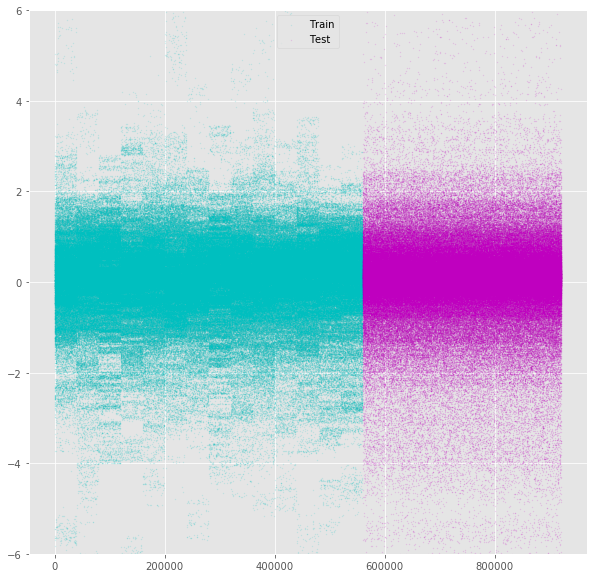

In [50]:
show_dataset(80)

In [43]:
def show_dataset(char):
    char = "c" + str(char)
    x = np.arange(len(df))
    x1 = x[df.target == 1]
    y1 = df[df.target == 1][char]
    x2 = x[df.target == 0]
    y2 = df[df.target == 0][char]
    x3 = np.arange(len(df_t)) + len(df)
    y3 = df_t[char]
    plt.figure(figsize=(10,10))
    plt.scatter(x1,y1, c="c", s=1, alpha=0.1)
    plt.scatter(x2,y2, c="c", s=1, alpha=0.1)
    plt.scatter(x3,y3, c="m", s=1, alpha=0.1)
    plt.ylim(-1,1)
    plt.show()

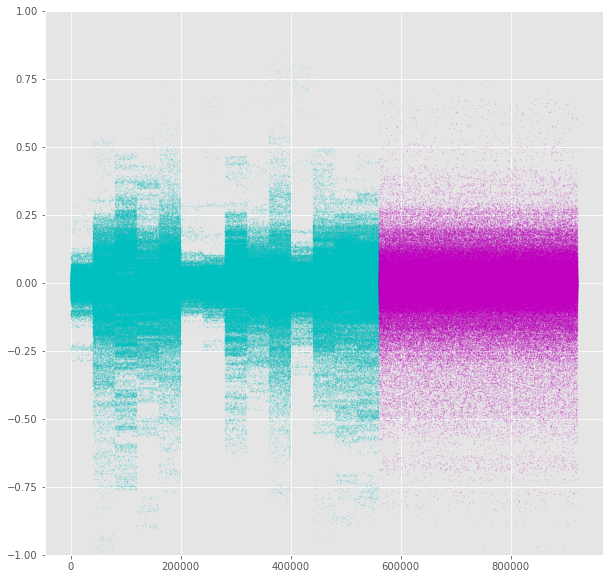

In [44]:
show_dataset(80)

In [68]:
def logloss(pred_y, ans_y=None):
    if ans_y is None:
        ans_y = np.ones(len(pred_y)) * 0.5
    l1 = ans_y * np.log(pred_y)
    l2 = (1 - ans_y) * np.log(1 - pred_y)
    return -(l1+l2)

/home/tazume/.pyenv/versions/anaconda2-4.1.1/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/home/tazume/.pyenv/versions/anaconda2-4.1.1/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


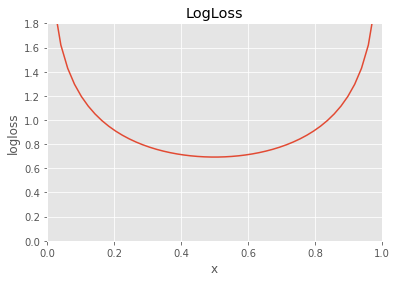

In [73]:
x = np.linspace(0,1) # グラフの横表示の指定
plt.plot(x, logloss(x), ls='-', label='logloss') # コサインの表示
plt.xlim(0, 1)
plt.ylim(0,1.8)
plt.axhline(0, ls='-', c='b', lw=0.5)
plt.axvline(0, ls='-', c='b', lw=0.5)
#plt.legend()
plt.xlabel('x')
plt.ylabel('logloss')
plt.title('LogLoss')
plt.show()